Dataset: https://drryanmaness.wixsite.com/cyberconflict/cyber-conflict-dataset

- States: A, B
- Cyber incidents: A (initiator) -> B (target)
- Dyadic dataset: A <-> B

Codebook: https://a678132e-4067-4ed4-800a-239c80659fd1.filesusr.com/ugd/4b99a4_ca35bdb6bd55443e890d2dab86910b4c.pdf

In [375]:
import pandas as pd

In [376]:
# Load the dataset
file_path = 'data/DCID_2.0_Release_update_February_2023.xlsx'
# Read file from excel
dcid = pd.read_excel(file_path, "DCID_2.0_Release_update_Februar")

# Avoid duplicates on the Cyberincidentnum 
# FIXME: THIS IS STRANGE but if have to do it if working with this sheet from Excel
dcid = dcid.drop_duplicates(subset='Cyberincidentnum', keep='first')

print(dcid)

     Cyberincidentnum  Dyadpair StateA    StateB  \
0                   1      2365     US    Russia   
2                   2      2365     US    Russia   
4                   3      2365     US    Russia   
6                   4      2365     US    Russia   
8                   5      2365     US    Russia   
..                ...       ...    ...       ...   
852               427    750770  India  Pakistan   
854               428    750770  India  Pakistan   
856               429    750770  India  Pakistan   
858               430    750770  India  Pakistan   
860               431    750770  India  Pakistan   

                                   Name interactionstartdate  method  \
0                Regin malware campaign  2008-02-01 00:00:00     3.0   
2                  QWERTY keystroke log  2008-02-01 00:14:24     4.4   
4                         Duke Series_A  2008-04-08 00:14:24     4.2   
6    US govt employee in Georgia hacked  2008-08-06 00:00:00     4.2   
8              

In [377]:
# Todo: # Convert the correlates of war country codes in to dcid to ISO codes
# cow_countries = pd.read_csv('data/COW-country-codes.csv')
# print(cow_countries)

# dcid_iso = dcid.merge(cow_countries, left_on='initiator', right_on='CCode', how='left')

# print(dcid_iso)

dcid_short = dcid[['initiator', 'target']]
print(dcid_short)


     initiator  target
0            2     365
2            2     365
4          365       2
6          365       2
8          365       2
..         ...     ...
852        770     750
854        770     750
856        770     750
858        770     750
860        750     770

[431 rows x 2 columns]


In [378]:
# Create the adjacency matrix for dcid_short

ct = pd.crosstab(dcid_short['initiator'], dcid_short['target'])
idx = ct.columns.union(ct.index)
adjacency_matrix = ct.reindex(index = idx, columns=idx, fill_value=0)

print(adjacency_matrix)

# Save the adjacency matrix to a csv file
adjacency_matrix.to_csv('adjacency_matrix.csv', index=True)

     2    20   200  220  255  290  365  366  368  369  ...  713  731  732  \
2      0    0    0    0    0    0    7    0    0    0  ...    0    2    0   
20     0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
200    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
220    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
255    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
290    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
365   40    3   10    3    5    3    0    4    6   28  ...    0    0    1   
366    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
368    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
369    0    0    0    0    0    0    2    0    0    0  ...    0    0    0   
372    0    0    0    0    0    0    1    0    0    0  ...    0    0    0   
630   21    0    0    0    0    0    0    0    0    0  ...    0    0    0   

In [379]:
# Check if the matrix is symmetric
import numpy as np
if np.array_equal(adjacency_matrix, adjacency_matrix.T):
    print('Matrix is symmetric')
else:
    print('Matrix is not symmetric')

# Save the adjacency matrix to a csv file
adjacency_matrix.to_csv('adjacency_matrix.csv') 

Matrix is not symmetric


In [380]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(adjacency_matrix)
print(G.edges(data=True))


[(710, 200, {'weight': 1}), (710, 900, {'weight': 3}), (710, 840, {'weight': 8}), (710, 830, {'weight': 1}), (710, 816, {'weight': 8}), (710, 750, {'weight': 11}), (710, 740, {'weight': 13}), (710, 713, {'weight': 12}), (710, 2, {'weight': 59}), (816, 816, {'weight': 1}), (816, 710, {'weight': 1}), (770, 750, {'weight': 18}), (770, 700, {'weight': 1}), (750, 770, {'weight': 8}), (740, 732, {'weight': 3}), (732, 740, {'weight': 5}), (732, 731, {'weight': 2}), (731, 710, {'weight': 1}), (731, 200, {'weight': 2}), (731, 740, {'weight': 2}), (731, 732, {'weight': 35}), (731, 220, {'weight': 1}), (731, 2, {'weight': 17}), (713, 710, {'weight': 1}), (666, 666, {'weight': 1}), (666, 660, {'weight': 1}), (666, 652, {'weight': 1}), (666, 630, {'weight': 7}), (652, 2, {'weight': 1}), (640, 652, {'weight': 1}), (640, 645, {'weight': 1}), (640, 365, {'weight': 2}), (630, 692, {'weight': 3}), (630, 670, {'weight': 12}), (630, 666, {'weight': 20}), (630, 640, {'weight': 7}), (630, 2, {'weight': 21})

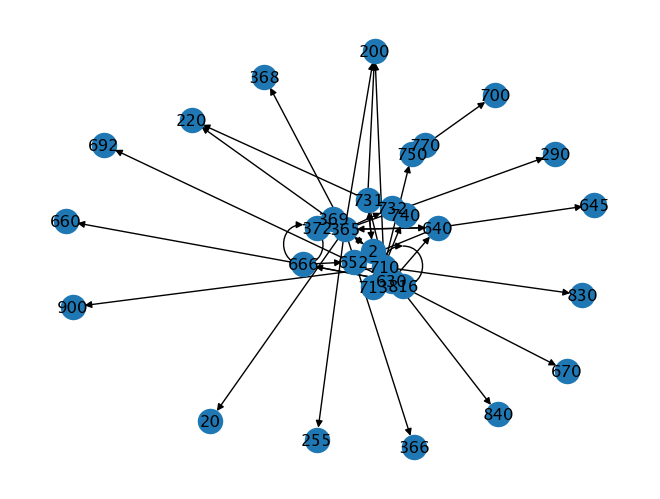

In [381]:
# Draw G graph including labels and weights
nx.draw(G, with_labels=True)


[(710, 816, {'weight': 8}), (710, 750, {'weight': 11}), (710, 740, {'weight': 13}), (710, 713, {'weight': 12}), (710, 2, {'weight': 59}), (816, 816, {'weight': 1}), (816, 710, {'weight': 1}), (770, 750, {'weight': 18}), (750, 770, {'weight': 8}), (740, 732, {'weight': 3}), (732, 740, {'weight': 5}), (732, 731, {'weight': 2}), (731, 710, {'weight': 1}), (731, 740, {'weight': 2}), (731, 732, {'weight': 35}), (731, 2, {'weight': 17}), (713, 710, {'weight': 1}), (666, 666, {'weight': 1}), (666, 652, {'weight': 1}), (666, 630, {'weight': 7}), (652, 2, {'weight': 1}), (640, 652, {'weight': 1}), (640, 365, {'weight': 2}), (630, 666, {'weight': 20}), (630, 640, {'weight': 7}), (630, 2, {'weight': 21}), (372, 365, {'weight': 1}), (369, 365, {'weight': 2}), (365, 732, {'weight': 1}), (365, 640, {'weight': 2}), (365, 372, {'weight': 8}), (365, 369, {'weight': 28}), (365, 2, {'weight': 40}), (2, 710, {'weight': 5}), (2, 731, {'weight': 2}), (2, 630, {'weight': 9}), (2, 365, {'weight': 7})]


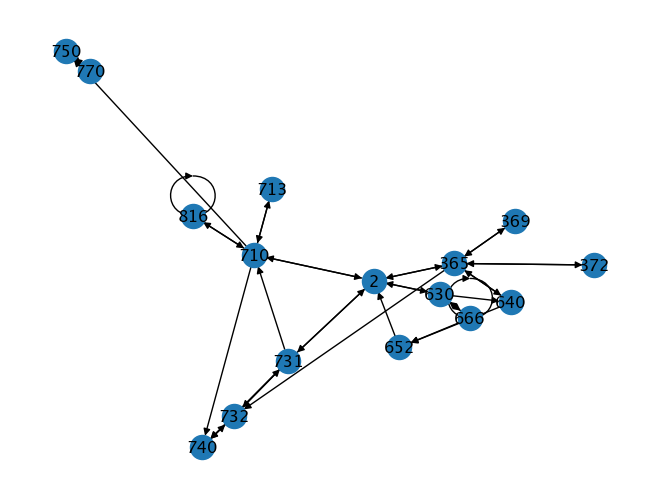

In [382]:
# Keep only nodes with outdegree > 0
# The node out_degree is the number of edges pointing out of the node
# The ones initiating the attack
outdeg = G.out_degree()

G2 = G.copy()
for node in G.nodes():
    if outdeg[node] == 0:
        G2.remove_node(node)

print(G2.edges(data=True))
nx.draw(G2, with_labels=True)

# Now we can see that some connections are only one way: e.g. 
# 365 Russia -> 732 (South Korea)
# FIXME: not every time I create the graph! WHY IS THIS RANDOM?

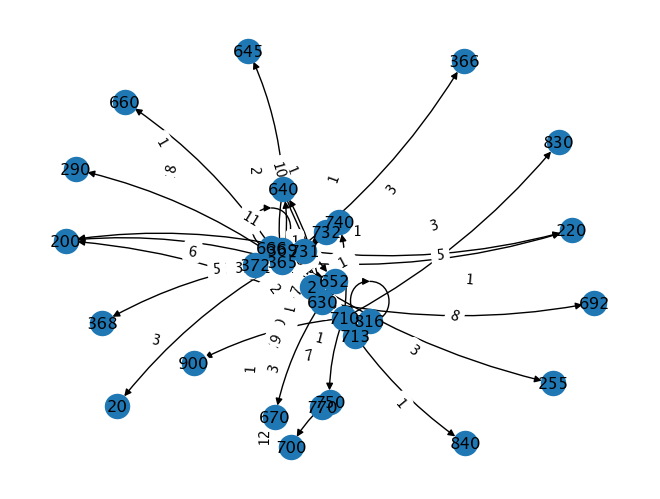

[(710, 200, {'weight': 1}), (710, 900, {'weight': 3}), (710, 840, {'weight': 8}), (710, 830, {'weight': 1}), (710, 816, {'weight': 8}), (710, 750, {'weight': 11}), (710, 740, {'weight': 13}), (710, 713, {'weight': 12}), (710, 2, {'weight': 59}), (816, 816, {'weight': 1}), (816, 710, {'weight': 1}), (770, 750, {'weight': 18}), (770, 700, {'weight': 1}), (750, 770, {'weight': 8}), (740, 732, {'weight': 3}), (732, 740, {'weight': 5}), (732, 731, {'weight': 2}), (731, 710, {'weight': 1}), (731, 200, {'weight': 2}), (731, 740, {'weight': 2}), (731, 732, {'weight': 35}), (731, 220, {'weight': 1}), (731, 2, {'weight': 17}), (713, 710, {'weight': 1}), (666, 666, {'weight': 1}), (666, 660, {'weight': 1}), (666, 652, {'weight': 1}), (666, 630, {'weight': 7}), (652, 2, {'weight': 1}), (640, 652, {'weight': 1}), (640, 645, {'weight': 1}), (640, 365, {'weight': 2}), (630, 692, {'weight': 3}), (630, 670, {'weight': 12}), (630, 666, {'weight': 20}), (630, 640, {'weight': 7}), (630, 2, {'weight': 21})

In [383]:
# Todo: find a better layout
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.1")

labels = nx.get_edge_attributes(G,'weight')

# FIXME: place the labels in a better way
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

# show the datastructure of the graph
print(G.edges(data=True))


In [384]:
# Show the network on a map
# https://towardsdatascience.com/from-geojson-to-network-graph-analyzing-world-country-borders-in-python-ab81b5a8ce5a 

# TODO: rework this part

# import geopandas as gpd
# plt.rcParams['font.family'] = 'Arial'

# world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# world_map = world_map[world_map['continent'] != 'Antarctica']
# world_map.plot()
# plt.show() 

# world_map = world_map.set_index('iso_a3')

# # 1. Geocode the countries
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="dcid-sna")

# def geolocate(country):
#     loc = geolocator.geocode(country)
#     return (loc.latitude, loc.longitude)

# print(geolocate('USA'))

# 2. Add the latitude and longitude to the graph

# for node in G.nodes:
#     country = labels[node]
#     lat, lon = geolocate(country)
#     G.nodes[node]['latitude'] = lat
#     G.nodes[node]['longitude'] = lon
# node_positions = {n: (d['longitude'], d['latitude']) for n, d in G.nodes(data=True)}

# 3. Plot the network on the map



In [385]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html
# The degree centrality for a node v is the fraction of nodes it is connected to.
centrality = nx.degree_centrality(G)
centrality = pd.DataFrame(centrality.items(), columns=['Country', 'Centrality'])
centrality = centrality.sort_values(by='Centrality', ascending=False)
print(centrality)


    Country  Centrality
25      365    0.533333
0       710    0.433333
30        2    0.300000
10      731    0.266667
20      630    0.233333
15      666    0.200000
9       732    0.166667
19      640    0.166667
5       816    0.133333
8       740    0.133333
17      652    0.100000
7       750    0.100000
1       200    0.100000
6       770    0.100000
11      713    0.066667
28      220    0.066667
22      369    0.066667
21      372    0.066667
13      692    0.033333
4       830    0.033333
2       900    0.033333
12      700    0.033333
3       840    0.033333
14      670    0.033333
18      645    0.033333
16      660    0.033333
23      368    0.033333
26      290    0.033333
24      366    0.033333
27      255    0.033333
29       20    0.033333


In [386]:
# Out Degree: https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.out_degree.html
# The node out_degree is the number of edges pointing out of the node. 
out_degree = G.out_degree()
sorted_out_degree = sorted(out_degree, key=lambda x: x[1], reverse=True)
sorted_out_degree = pd.DataFrame(sorted_out_degree, columns=['Country', 'Out Degree'])
print(sorted_out_degree)

# Weighted out degree
# The weighted node degree is the sum of the edge weights for edges incident to that node.
weighted_out_degree = G.out_degree(weight='weight')
sorted_weighted_out_degree = sorted(weighted_out_degree, key=lambda x: x[1], reverse=True)
sorted_weighted_out_degree = pd.DataFrame(sorted_weighted_out_degree, columns=['Country', 'Weighted Out Degree'])
print(sorted_weighted_out_degree)

    Country  Out Degree
0       365          12
1       710           9
2       731           6
3       630           5
4       666           4
5         2           4
6       640           3
7       816           2
8       770           2
9       732           2
10      750           1
11      740           1
12      713           1
13      652           1
14      372           1
15      369           1
16      200           0
17      900           0
18      840           0
19      830           0
20      700           0
21      692           0
22      670           0
23      660           0
24      645           0
25      368           0
26      366           0
27      290           0
28      255           0
29      220           0
30       20           0
    Country  Weighted Out Degree
0       710                  116
1       365                  113
2       630                   63
3       731                   58
4         2                   23
5       770                   19
6

In [387]:
# In Degree: https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_degree.html
# The node in_degree is the number of edges pointing to the node. 
# Number of antagonsits attacking a country
in_degree = G.in_degree()
sorted_in_degree = sorted(in_degree, key=lambda x: x[1], reverse=True)
sorted_in_degree = pd.DataFrame(sorted_in_degree, columns=['Country', 'In Degree'])
print(sorted_in_degree)

# The weighted node degree is the sum of the edge weights for edges incident to that node.
weighted_in_degree = G.in_degree(weight='weight')
sorted_weighted_in_degree = sorted(weighted_in_degree, key=lambda x: x[1], reverse=True)
sorted_weighted_in_degree = pd.DataFrame(sorted_weighted_in_degree, columns=['Country', 'Weighted In Degree'])
print(sorted_weighted_in_degree)

    Country  In Degree
0         2          5
1       710          4
2       365          4
3       200          3
4       740          3
5       732          3
6       816          2
7       750          2
8       731          2
9       666          2
10      652          2
11      640          2
12      630          2
13      220          2
14      900          1
15      840          1
16      830          1
17      770          1
18      713          1
19      700          1
20      692          1
21      670          1
22      660          1
23      645          1
24      372          1
25      369          1
26      368          1
27      366          1
28      290          1
29      255          1
30       20          1
    Country  Weighted In Degree
0         2                 138
1       732                  39
2       750                  29
3       369                  28
4       666                  21
5       740                  20
6       630                  16
7       

In [388]:
# Reciprocity: https://networkx.org/documentation/stable/reference/algorithms/reciprocity.html
# The reciprocity of a directed graph is the ratio of the number of edges pointing in both directions
# to the total number of edges in the graph.

reciprocity = nx.overall_reciprocity(G)
print(reciprocity)


0.4727272727272727


In [389]:
# Cliques: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.find_cliques.html
# A clique in an undirected graph is a subset of the nodes such that every two nodes in the subset are adjacent.

# cliques = nx.find_cliques(G)
# Only works for an undirected graph